## Classificação de Testeo | SpaCy
-  LNProcessing

**março, 20 2023**

In [6]:
!pip install seaborn==0.10.0
!pip install spacy

import spacy
spacy.__version__

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.2/12.2 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 122.7/122.7 kB 7.0 MB/s eta 0:00:00
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
     ------------------------------------- 483.8/483.8 kB 10.1 MB/s eta 0:00:00
  Using cached weasel-0.3.4-py3-none-any.whl (50 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
     ---------------------------------------- 1.5/1.5 MB 11.9 MB/s eta 0:00:00
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Using cac

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


'3.7.4'

In [7]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [8]:
!python -m sbpacy download pt

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 13.0/13.0 MB 8.6 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use
the full pipeline package name 'pt_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### Bibliotecas e Definições

In [33]:
pln = spacy.load('pt_core_news_sm')

from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

from IPython.display import Markdown as md

import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

### Carregamento de Dados

In [48]:
db = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/NLProcessing/main/07%20%E2%80%A2%20Class%20SpaCy/dados/base_treinamento.txt')

db['emocao'] = db['emocao'].astype('category')
db.sample(3)

,texto,emocao
74,vou te chamar para comemorar,alegria
15,amar é maravilhoso,alegria
98,sou querida pelos meu amigos,alegria


<AxesSubplot:xlabel='emocao', ylabel='count'>

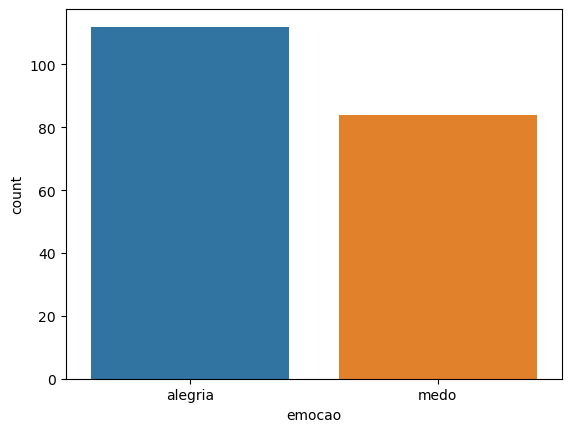

In [49]:
sns.countplot(db['emocao'], label='Contagem')

### Função | Pré-processamento de Textos

In [50]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
display(md(f'### Tamanho: `{len(stop_words)}`'))
print(stop_words)

### Tamanho: `416`

{'ir', 'sete', 'adeus', 'acerca', 'mas', 'três', 'aos', 'mal', 'essa', 'diante', 'aí', 'vez', 'para', 'algumas', 'devem', 'cada', 'pela', 'vários', 'ao', 'enquanto', 'certeza', 'da', 'põem', 'e', 'dezoito', 'tentei', 'local', 'pouca', 'isso', 'sétimo', 'aquelas', 'estivemos', 'sei', 'umas', 'exemplo', 'meus', 'poderá', 'estivestes', 'pelas', 'faço', 'com', 'era', 'bom', 'zero', 'oitava', 'muito', 'tenho', 'menor', 'nuns', 'momento', 'aqueles', 'numa', 'ambos', 'essas', 'grandes', 'quatro', 'puderam', 'outros', 'além', 'do', 'tentaram', 'ela', 'teu', 'vêm', 'ter', 'saber', 'estas', 'alguns', 'daquela', 'sua', 'que', 'parte', 'terceira', 'assim', 'esses', 'debaixo', 'sabe', 'uma', 'nossas', 'foi', 'muitos', 'quinze', 'maiorias', 'tendes', 'agora', 'novos', 'dar', 'dizem', 'mesmo', 'uns', 'mais', 'iniciar', 'vocês', 'diz', 'vais', 'estive', 'segundo', 'lugar', 'cinco', 'cá', 'onze', 'pelo', 'vossos', 'sim', 'coisa', 'fazeis', 'também', 'vem', 'sempre', 'deve', 'até', 'maior', 'apontar', '

In [52]:
def preproc(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [53]:
teste = preproc('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Fatec')
teste

'aprender processamento linguagem natural curso fatec'

## `4` Pré-processamento

In [54]:
db.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [55]:
# Aplicação do pre-processamento
db['texto'] = db['texto'].apply(preproc)
db.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


### Treinamento da Classe

In [56]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [68]:
db_final = []

for texto, emocao in zip(db['texto'], db['emocao']):
    #print(texto, emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})
    
    db_final.append([texto, dic.copy()])
    
display(md(f'#### Tamanho: `{len(base_dados_final)}`'))

#### Tamanho: `392`

In [67]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

## `5` Criação do Classificador

In [91]:
from spacy.training import Example

modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [93]:
modelo.begin_training()
for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}
    for batch in spacy.util.minibatch(base_dados_final, 30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
        modelo.update(examples, losses=losses)
    if epoca % 100 == 0:
        display(md(f'#### Perda: `{losses["textcat"]}`'))
        historico.append(losses)

#### Perda: `2.914497524499893`

#### Perda: `9.298156943829058e-12`

#### Perda: `8.547793651006701e-13`

#### Perda: `1.5923824526914792e-13`

#### Perda: `3.7887467985918875e-14`

#### Perda: `1.1816869720388532e-14`

#### Perda: `3.4441297062604446e-15`

#### Perda: `7.281760598682703e-16`

#### Perda: `2.1796958235535007e-16`

#### Perda: `6.013552202332354e-17`

In [94]:
historico_loss = []

for i in historico: historico_loss.append(i.get('textcat'))
    
historico_loss = np.array(historico_loss)
historico_loss

array([2.50000000e-01, 2.91449752e+00, 9.29815694e-12, 8.54779365e-13,
       1.59238245e-13, 3.78874680e-14, 1.18168697e-14, 3.44412971e-15,
       7.28176060e-16, 2.17969582e-16, 6.01355220e-17])

Text(0, 0.5, 'Erro')

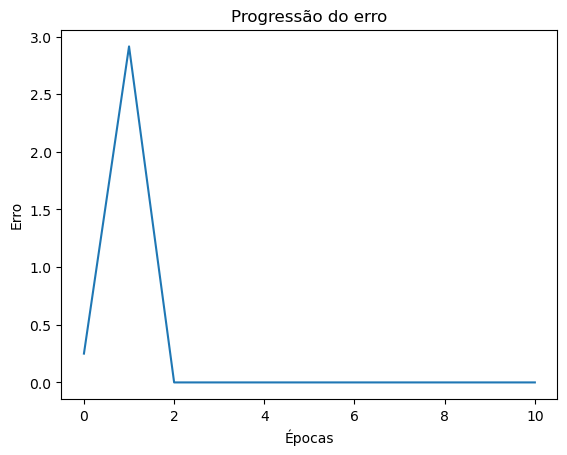

In [95]:
import matplotlib.pyplot as plt

plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [96]:
# Exportando o modelo
modelo.to_disk("modelo")

## `6` Teste com Frases

In [99]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [108]:
texto_positivo = 'eu adoro cor dos seus olhos'

texto_positivo = preproc(texto_positivo)

previsao = modelo_carregado(texto_positivo)

display(md(f"### Alegria: `{round(previsao.cats['ALEGRIA'])}` | Medo `{round(previsao.cats['MEDO'])}`"))

### Alegria: `1` | Medo `0`

## Avaliação do Modelo

In [112]:
previsoes = []
for texto in db['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

previsoes

[{'ALEGRIA': 1.0, 'MEDO': 2.947608823689052e-10},
 {'ALEGRIA': 1.0, 'MEDO': 6.376345007552686e-10},
 {'ALEGRIA': 1.0, 'MEDO': 1.0169991515596166e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.299703453864879e-10},
 {'ALEGRIA': 1.0, 'MEDO': 1.787757164528614e-10},
 {'ALEGRIA': 1.0, 'MEDO': 7.446119276721674e-10},
 {'ALEGRIA': 1.0, 'MEDO': 2.1829664742512023e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.505307486610491e-10},
 {'ALEGRIA': 1.0, 'MEDO': 5.595115482037727e-10},
 {'ALEGRIA': 1.0, 'MEDO': 5.01972574618037e-10},
 {'ALEGRIA': 1.0, 'MEDO': 7.579784022659908e-10},
 {'ALEGRIA': 1.0, 'MEDO': 7.612441232929257e-10},
 {'ALEGRIA': 1.0, 'MEDO': 1.7480999980890033e-10},
 {'ALEGRIA': 1.0, 'MEDO': 6.558905640829948e-10},
 {'ALEGRIA': 1.0, 'MEDO': 2.1762813773307244e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.329528733419522e-10},
 {'ALEGRIA': 1.0, 'MEDO': 4.97597130166838e-10},
 {'ALEGRIA': 1.0, 'MEDO': 1.0431276675770818e-10},
 {'ALEGRIA': 1.0, 'MEDO': 6.018400222629339e-10},
 {'ALEGRIA': 1.0, 'MEDO': 1.5089619553876332e-0

In [113]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [115]:
respostas_reais = db['emocao'].values
respostas_reais

['alegria', 'alegria', 'alegria', 'alegria', 'alegria', ..., 'medo', 'medo', 'medo', 'medo', 'medo']
Length: 196
Categories (2, object): ['alegria', 'medo']

<AxesSubplot:>

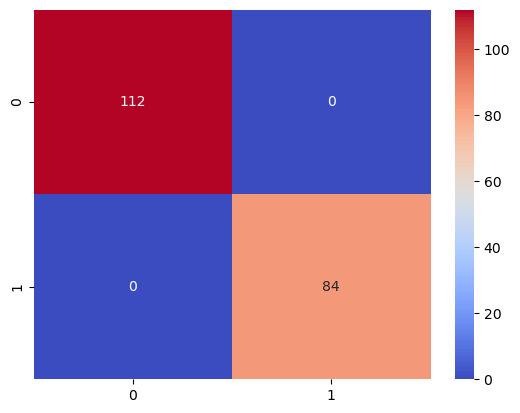

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

cm = confusion_matrix(respostas_reais, previsoes_final)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')

## Avaliação da Base de Dados

In [130]:
db_teste = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/NLProcessing/main/07%20%E2%80%A2%20Class%20SpaCy/dados/base_teste.txt', encoding = 'utf-8')
db_teste.head(10)

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria
5,ficou lindo,alegria
6,achei esse sapato muito simpático,alegria
7,estou ansiosa pela sua chegada,alegria
8,congratulações pelo seu aniversário,alegria
9,delicadamente ele a colocou para dormir,alegria


In [138]:
db_teste['emocao'] = db_teste['emocao'].astype('category')
db_teste['texto'] = db_teste['texto'].apply(preproc)

db_teste.head(10)

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria
5,ficar lir,alegria
6,achar sapato simpático,alegria
7,ansioso por o chegada,alegria
8,congratulação por o aniversário,alegria
9,delicadamente colocar dormir,alegria


In [141]:
previsoes = []
for texto in db_teste['texto']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [142]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [147]:
respostas_reais = db_teste['emocao'].values

print(accuracy_score(respostas_reais, previsoes_final))

cm = confusion_matrix(respostas_reais, previsoes_final)
cm

0.6309523809523809


array([[33, 15],
       [16, 20]], dtype=int64)